#**Pythonでアメリカのフィリップス曲線をプロットする**

このColabノートブックでは、モジュールpandas-datareaderを使って、アメリカのフィリップス曲線をプロットする方法を説明します。日本のフィリップス曲線は右下がりのグラフになりましたが、アメリカの場合はどうなるでしょう？

早速やってみましょう！

なお、このノートブックは「[Pythonの第一歩](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_python入門_1_basic.ipynb)」をすでに読んでいることを前提にしています。


**FREDとは？**
<br>
FRED（Federal Reserve Economic Data）とはアメリカのセントルイス連邦準備銀行が提供している経済統計データベースです。このサイトではアメリカを含め世界各国の経済統計（経済データ）約80万種類が提供されています。提供しているデータはすべてオープンデータです（オープンデータは講義資料で説明済み）。

**FREDにチャレンジしてください**
<br>
FREDは英語で書かれたサイトなので、「英語はちょっと・・・」と思う人もいるかもしれません。私自身も英語は得意ではありませんが、FREDで必要な英語はそれほど難しくありません。FREDに使い慣れておくと皆さんの可能性が広がりますので、チャレンジしてみてください。

**FRED公式サイト**
<br>
https://fred.stlouisfed.org/

**pandas-datareader公式サイト**
<br>
https://pydata.github.io/pandas-datareader/remote_data.html#remote-data-fred 

In [ ]:
# 最初に重要な呪文を唱えます。
# pandas_datareaderをdrという名前で読み込みます
# 呼び出すモジュール名がpandas_datareaderであることに注意！
import pandas_datareader as dr
# pandasをpdという名前で読み込みます
import pandas as pd
# datetimeをdtという名前で読み込みます
import datetime as dt


**アメリカのフィリップス曲線**

アメリカのフィリップス曲線をプロットしてみましょう。フィリップス曲線に必要なデータはアメリカの失業率とインフレ率です。

失業率は
<br>
https://fred.stlouisfed.org/series/LRUN64TTUSA156N

インフレ率は
<br>
https://fred.stlouisfed.org/series/FPCPITOTLZGUSA

データが取得できたら散布図を使ってフィリップス曲線をプロットしてみましょう。

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html

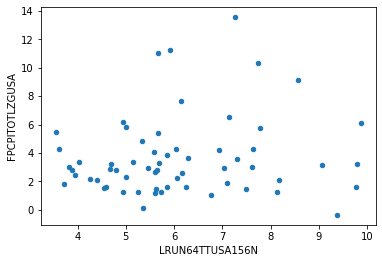

In [10]:
start = dt.datetime(1960, 1, 1)
end = dt.datetime(2020, 12, 31)

us_phillips_long = dr.DataReader(['LRUN64TTUSA156N', 'FPCPITOTLZGUSA'], 'fred', start, end)
#us_phillips_long.tail()

us_phillips_long.plot.scatter(x="LRUN64TTUSA156N", y="FPCPITOTLZGUSA")


In [17]:
us_phillips_long.corr()

,LRUN64TTUSA156N,FPCPITOTLZGUSA
LRUN64TTUSA156N,1.000000,0.129139
FPCPITOTLZGUSA,0.129139,1.000000


1960年から2020年までのアメリカのデータを使い、フィリップス曲線をプロットしてみましたが、日本のような右下がりのフィリップス曲線にはなりません。なかなか興味深いですね。

ここで少し遊んでみましょう。2000年から2020年までに期間を区切ってフィリップス曲線をプロットしてみましょう。

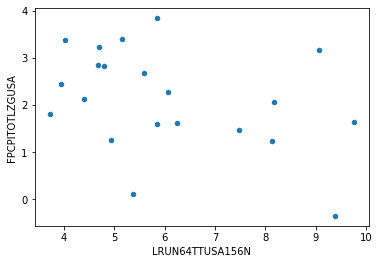

In [15]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2020, 12, 31)

us_phillips_recent = dr.DataReader(['LRUN64TTUSA156N', 'FPCPITOTLZGUSA'], 'fred', start, end)
#us_phillips_recent.tail()

us_phillips_recent.plot.scatter(x="LRUN64TTUSA156N", y="FPCPITOTLZGUSA")


In [16]:
us_phillips_recent.corr()

,LRUN64TTUSA156N,FPCPITOTLZGUSA
LRUN64TTUSA156N,1.000000,-0.379089
FPCPITOTLZGUSA,-0.379089,1.000000


データを取る期間を変えると、負の相関があるという結果になりました。なかなか興味深いですね。

この例から「Pythonを学ぶと効率的にデータ分析ができるようになる」ことを分かってもらえればと思います。

> なお、授業で説明したとおり、散布図や相関係数は相関を示すときには有力な手法ですが、因果を意味するわけではありません。


**まとめ**

pandas_datareaderはFRED以外にもいろいろな経済統計データベース（オープンデータ）からデータを一気にダウンロードできる便利なモジュールです。

興味が湧いた人は公式サイトや以下の参考文献をみて、ぜひいろいろと試してみてください。

**公式サイト**
<br>
https://pydata.github.io/pandas-datareader/remote_data.html
<br>
<br>
**参考文献**

https://medium.com/swlh/pandas-datareader-federal-reserve-economic-data-fred-a360c5795013

https://dev.classmethod.jp/articles/pandas_datareader-python/

https://qiita.com/innovation1005/items/edcf78cbf89477b3b0a7
